In [20]:
import pandas as pd

# Load your dataset
df = pd.read_csv("simulated_support_tickets_enriched.csv")  # replace with your actual file name

# Show first 5 rows
df.head()


,TicketID,TicketText,Category,Priority,SentimentScore,Timestamp,UserSegment
0,TCKT0001,The system crashes when I try to upload a file...,Bug,Medium,0.55,2025-01-12 16:10:19,SMB
1,TCKT0002,"Hey team, Please add export to PDF functionali...",Feature Request,Medium,0.23,2025-02-12 06:54:19,Enterprise
2,TCKT0003,"Hi, Please add export to PDF functionality. Th...",Feature Request,High,0.62,2025-03-17 16:56:19,Enterprise
3,TCKT0004,"Hi, My invoice shows an incorrect amount.",Billing,High,1.00,2025-01-16 21:11:19,SMB
4,TCKT0005,"Hello, Please add export to PDF functionality....",Feature Request,Low,0.18,2025-04-23 20:09:19,SMB


In [21]:
import re
import nltk
nltk.download('punkt')

from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
GENERAL CLEANING ON CUSTOMER TICKETTEXT OR REVIEW

In [23]:
# Clean text: lowercase, remove special characters, greetings, trailing thanks (Token; purpose of converting to token, When a computer 
#reads a sentence, it splits it into tokens to understand it better.)

def clean_text(text):
    text = text.lower()                          # lowercase
    text = re.sub(r'\d+', '', text)              # remove numbers
    text = re.sub(r'[^\w\s]', '', text)          # remove punctuation
    text = re.sub(r'\s+', ' ', text).strip()     # clean extra spaces
    text = re.sub(r'\b(hi|hello|hey team|thanks|please)\b', '', text)  # remove common fluff
    return text

df['CleanedText'] = df['TicketText'].apply(clean_text)
df['Tokens'] = df['CleanedText'].apply(word_tokenize)

df[['TicketText', 'CleanedText', 'Tokens']].head()


,TicketText,CleanedText,Tokens
0,The system crashes when I try to upload a file...,the system crashes when i try to upload a file...,"[the, system, crashes, when, i, try, to, uploa..."
1,"Hey team, Please add export to PDF functionali...",add export to pdf functionality this is urgent,"[add, export, to, pdf, functionality, this, is..."
2,"Hi, Please add export to PDF functionality. Th...",add export to pdf functionality this is urgent,"[add, export, to, pdf, functionality, this, is..."
3,"Hi, My invoice shows an incorrect amount.",my invoice shows an incorrect amount,"[my, invoice, shows, an, incorrect, amount]"
4,"Hello, Please add export to PDF functionality....",add export to pdf functionality respond asap,"[add, export, to, pdf, functionality, respond,..."


In [24]:
# Stop Word Removal (ONLY) ;  (Purpose: To remove unimportant words like ;the, is, a, and, in, to etc.  Example:Let’s say you 
#have two customer tickets;  The app is not working  & App not working  They mean the same thing)#

from nltk.corpus import stopwords
nltk.download('stopwords')

# Load English stopwords
stop_words = set(stopwords.words('english'))

# Remove stopwords from tokens
df['NoStopWords'] = df['Tokens'].apply(lambda words: [w for w in words if w not in stop_words])

# Show example
df[['TicketText', 'Tokens', 'NoStopWords']].head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,TicketText,Tokens,NoStopWords
0,The system crashes when I try to upload a file...,"[the, system, crashes, when, i, try, to, uploa...","[system, crashes, try, upload, file, respond, ..."
1,"Hey team, Please add export to PDF functionali...","[add, export, to, pdf, functionality, this, is...","[add, export, pdf, functionality, urgent]"
2,"Hi, Please add export to PDF functionality. Th...","[add, export, to, pdf, functionality, this, is...","[add, export, pdf, functionality, urgent]"
3,"Hi, My invoice shows an incorrect amount.","[my, invoice, shows, an, incorrect, amount]","[invoice, shows, incorrect, amount]"
4,"Hello, Please add export to PDF functionality....","[add, export, to, pdf, functionality, respond,...","[add, export, pdf, functionality, respond, asap]"


In [25]:
#Normalization in NLP means: Reducing words to their root form or base meaning. This helps group different versions
# of a word like: “runs”, “running”, “ran” → “run”

from nltk.stem import PorterStemmer, WordNetLemmatizer
nltk.download('wordnet')

# Create stemmer and lemmatizer objects
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Apply stemming
df['Stemmed'] = df['NoStopWords'].apply(lambda words: [stemmer.stem(w) for w in words])

# Apply lemmatization
df['Lemmatized'] = df['NoStopWords'].apply(lambda words: [lemmatizer.lemmatize(w) for w in words])

# Show example
df[['NoStopWords', 'Stemmed', 'Lemmatized']].head()


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,NoStopWords,Stemmed,Lemmatized
0,"[system, crashes, try, upload, file, respond, ...","[system, crash, tri, upload, file, respond, asap]","[system, crash, try, upload, file, respond, asap]"
1,"[add, export, pdf, functionality, urgent]","[add, export, pdf, function, urgent]","[add, export, pdf, functionality, urgent]"
2,"[add, export, pdf, functionality, urgent]","[add, export, pdf, function, urgent]","[add, export, pdf, functionality, urgent]"
3,"[invoice, shows, incorrect, amount]","[invoic, show, incorrect, amount]","[invoice, show, incorrect, amount]"
4,"[add, export, pdf, functionality, respond, asap]","[add, export, pdf, function, respond, asap]","[add, export, pdf, functionality, respond, asap]"


#The Relationship Between Stop Word Removal and Normalization n the normalization code, you're applying stemming and lemmatization on that NoStopWords #column — the output from the previous step.

In [9]:
# Purpose: Convert processed text (tokens) into numerical features, because Computers cannot understand text directly. They only understand numbers.
# So, each token (word) is represented by a different number (0 & 1) or value during training.
# This process allows machine learning models to analyze patterns, similarities, and meaning in customer tickets.

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Join cleaned tokens back into string
df['ProcessedText'] = df['Lemmatized'].apply(lambda x: ' '.join(x))

# BoW
bow = CountVectorizer()
bow_matrix = bow.fit_transform(df['ProcessedText'])

# TF-IDF
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(df['ProcessedText'])

# Top features
bow_df = pd.DataFrame(bow_matrix.toarray(), columns=bow.get_feature_names_out())
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())

bow_df.head()

,accessing,account,add,amount,app,asap,charged,crash,dark,dashboard,...,suspended,system,try,twice,update,upload,urgent,user,visualization,would
0,0,0,0,0,0,1,0,1,0,0,...,0,1,1,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


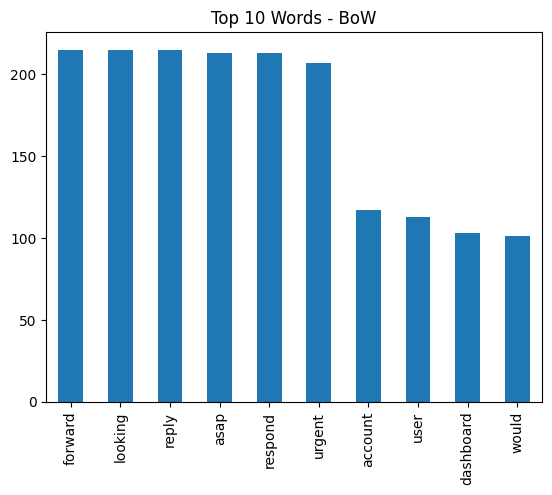

In [26]:
# Visualize word frequency or TF-IDF weight using bar plots.
# Summary of the total counts of the top 10 most frequent words across all customer tickets.

import matplotlib.pyplot as plt

top_words = bow_df.sum().sort_values(ascending=False).head(10)
top_words.plot(kind='bar', title='Top 10 Words - BoW')
plt.show()


In [ ]:
# Business Insight Extraction

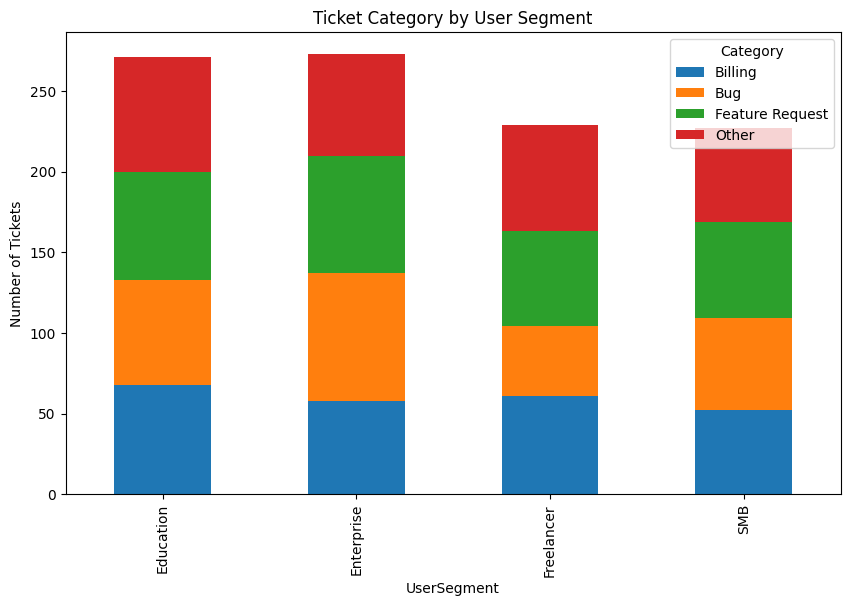

In [27]:
# Group tickets by UserSegment and Category
grouped = df.groupby(['UserSegment', 'Category']).size().unstack().fillna(0)
grouped.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Ticket Category by User Segment')
plt.ylabel('Number of Tickets')
plt.show()

In [12]:
#Analyze average sentiment per segment or category over time

# Convert Timestamp to datetime (if not done)
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Extract Month-Year
df['MonthYear'] = df['Timestamp'].dt.to_period('M').astype(str)

# Group by Month-Year and UserSegment → Average Sentiment
sentiment_by_segment = df.groupby(['MonthYear', 'UserSegment'])['SentimentScore'].mean().unstack()

sentiment_by_segment

UserSegment,Education,Enterprise,Freelancer,SMB
MonthYear,,,,
2025-01,0.321786,0.244634,0.312889,0.359318
2025-02,0.330625,0.367436,0.258421,0.255758
2025-03,0.228039,0.298958,0.297857,0.275532
2025-04,0.222353,0.293571,0.330606,0.259375
2025-05,0.320000,0.244815,0.193889,0.305250
2025-06,0.235625,0.422653,0.258571,0.290667
2025-07,0.390000,NaN,NaN,0.420000


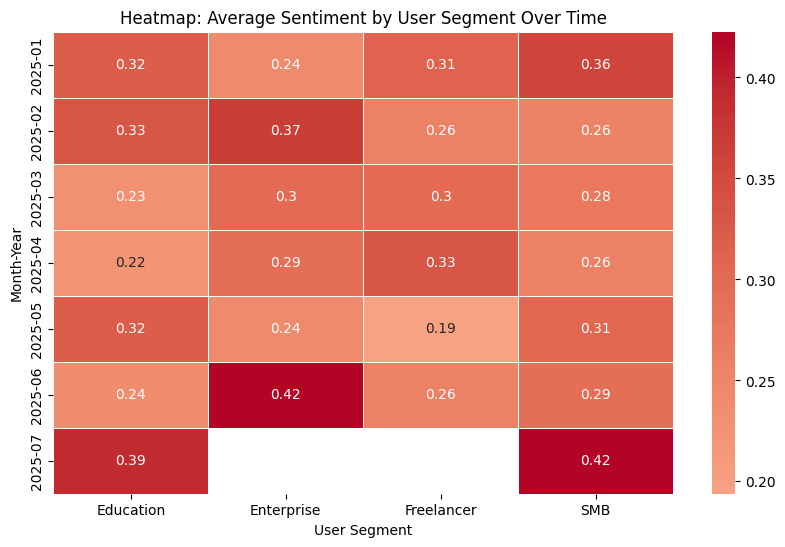

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(sentiment_by_segment, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Heatmap: Average Sentiment by User Segment Over Time')
plt.ylabel('Month-Year')
plt.xlabel('User Segment')
plt.show()

In [ ]:
# BUILDING OF LOGISTIC REGRESSION MODEL 

In [ ]:
# Import important library for building a model

import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [ ]:
# Convert the cleaned text into numerical features using TF-IDF 
# (X = features matrix, one row per ticket; y = labels, one category per ticket)

tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df['ProcessedText'])  # ✅ Uses ALL rows
y = df['Category']                            # ✅ Uses ALL rows

In [ ]:
# Even though we split, all 1001 rows are used for training + testing together

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train Model on All Rows

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)   # Trained on 80% of ALL rows

In [ ]:
# Predict and Evaluate

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

In [30]:
MARKDOWN INSIGHTS 
#Key insights by segment/category 

The Education and Enterprise segments have the highest number of customer tickets, each with over 275 complaints.
This suggests these segments are either:
1. Heavily using the product/service.
2. Facing more challenges that prompt them to raise tickets.

The Freelancer and Small & Medium Business (SMB) segments show lower ticket volumes, each around 250 complaints.
Possible interpretations:
1. They may be smaller user bases or have simpler use cases.
2. Or they might have lower engagement with the support system.


#Sentiment patterns
    
High Sentiment Peaks: 42% Complaint Levels
From the heatmap of average sentiment by user segment over time, we can observe that:
1. In June 2025 (2025-06), the Enterprise segment recorded the highest complaint sentiment, reaching 42%. This indicates a significant
surge in customer issues or dissatisfaction from enterprise users during this period.
2. Similarly, in July 2025 (2025-07), the SMB (Small and Medium Business) segment also experienced a peak of 42% complaint sentiment, 
highlighting a notable increase in customer concerns.

Low Sentiment Valleys: Minimal Complaints
1. The Freelancer segment had the lowest complaint sentiment in May 2025 (2025-05), with just 19%, showing:
Either fewer issues or possibly lower engagement with the complaint system.
2. in July 2025 (2025-07), both the Freelancer and Enterprise segments recorded zero complaints in the heatmap, indicating:
A positive shift in customer satisfaction or inactive periods for those segments.


# Strategic business recommendations

1. Focus on High-Ticket Segments (Education & Enterprise):
These segments generate the highest number of complaints (275+ tickets).
Provide dedicated support teams, customized help resources, and proactive communication during system changes or updates.

2. Manage Temporal Complaint Spikes:
Significant sentiment peaks were observed in Enterprise (June 2025) and SMB (July 2025) with 42% complaint levels.
Conduct root cause analysis and implement preventive measures before high-risk periods to avoid repeated issues.

3. Strengthen Engagement with Low-Complaint Segments (Freelancer & SMB):
Segments like Freelancer (19% in May 2025) and zero complaints in July may reflect satisfaction or disengagement.
Boost interaction through targeted engagement campaigns, surveys, and feature education.

SyntaxError: leading zeros in decimal integer literals are not permitted; use an 0o prefix for octal integers (326404235.py, line 19)